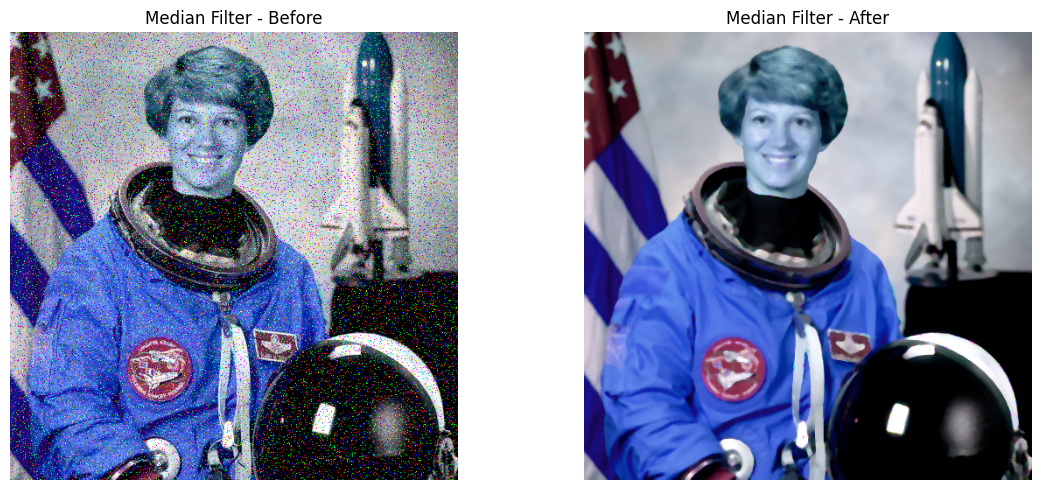

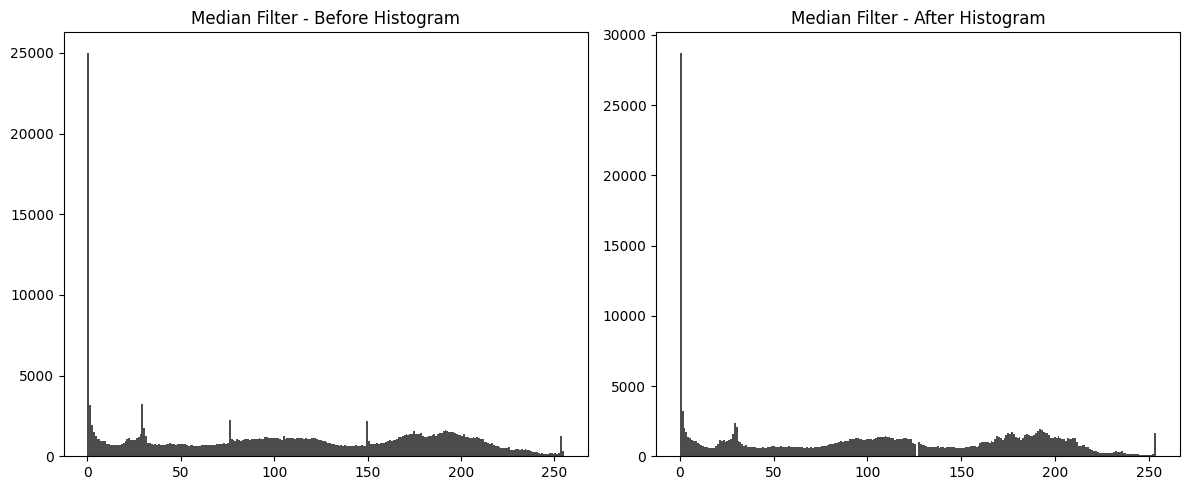

Median Filter -> PSNR: 17.63, SSIM: 0.2526
Median Filter -> Before - Brightness: 109.04, Contrast: 74.72
Median Filter -> After - Brightness: 106.84, Contrast: 74.60


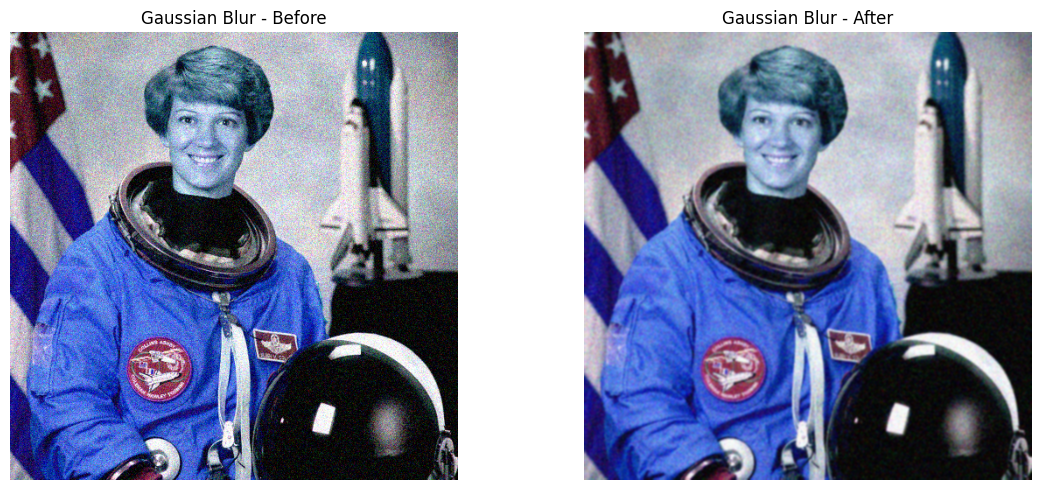

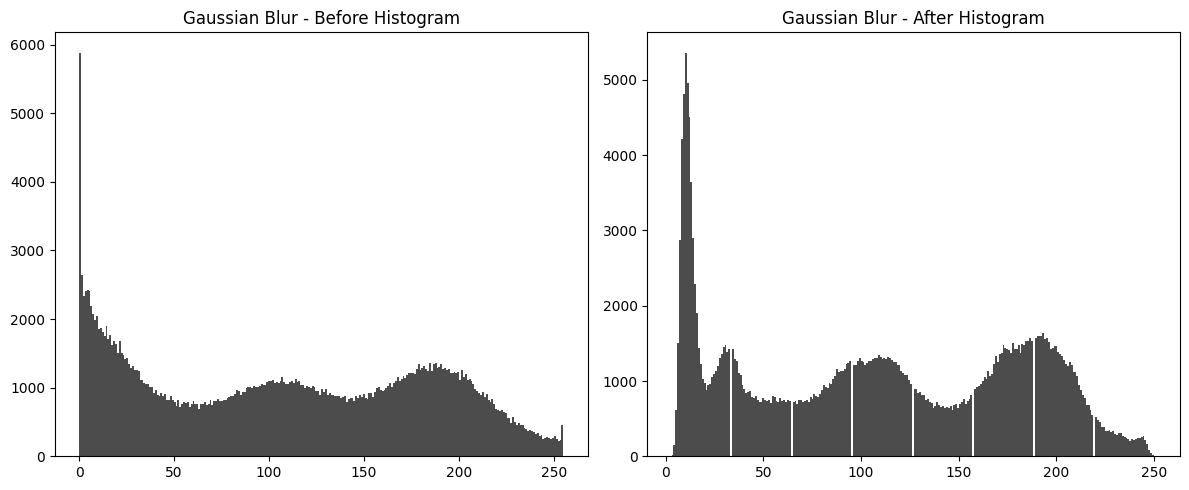

Gaussian Blur -> PSNR: 23.94, SSIM: 0.5707
Gaussian Blur -> Before - Brightness: 108.90, Contrast: 73.93
Gaussian Blur -> After - Brightness: 108.90, Contrast: 70.78


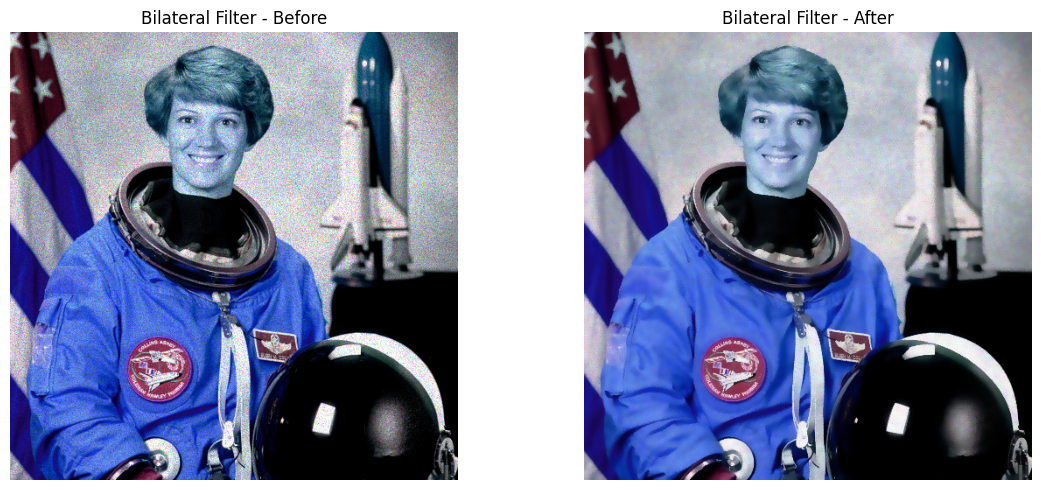

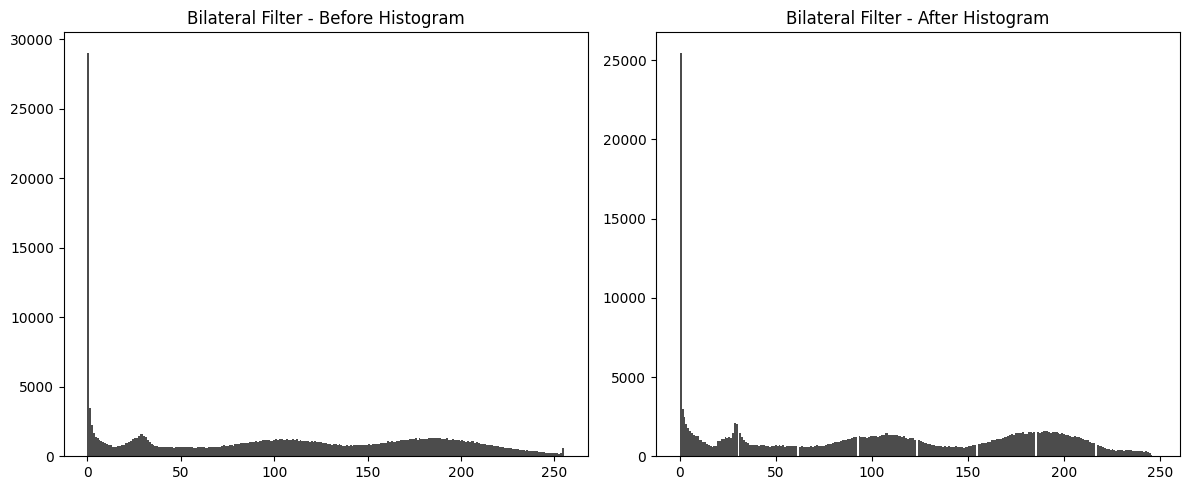

Bilateral Filter -> PSNR: 28.36, SSIM: 0.7902
Bilateral Filter -> Before - Brightness: 106.61, Contrast: 75.71
Bilateral Filter -> After - Brightness: 106.51, Contrast: 74.44


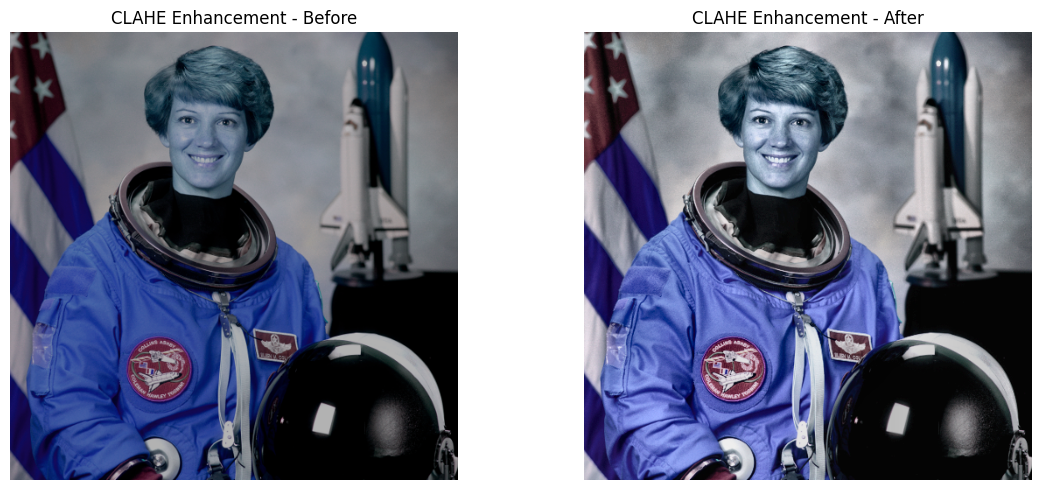

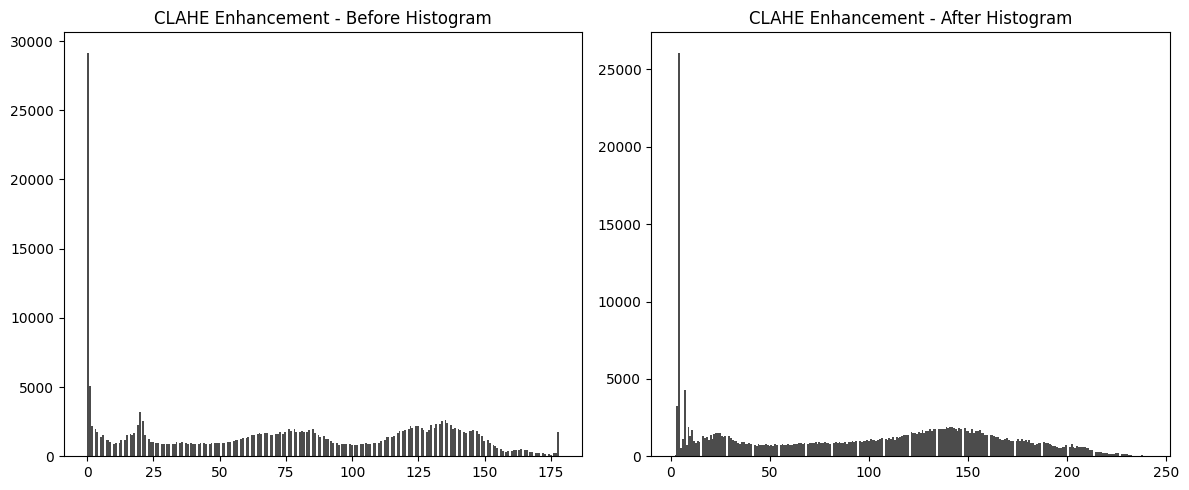

CLAHE Enhancement -> PSNR: 18.41, SSIM: 0.7697
CLAHE Enhancement -> Before - Brightness: 74.94, Contrast: 52.79
CLAHE Enhancement -> After - Brightness: 97.80, Contrast: 64.72


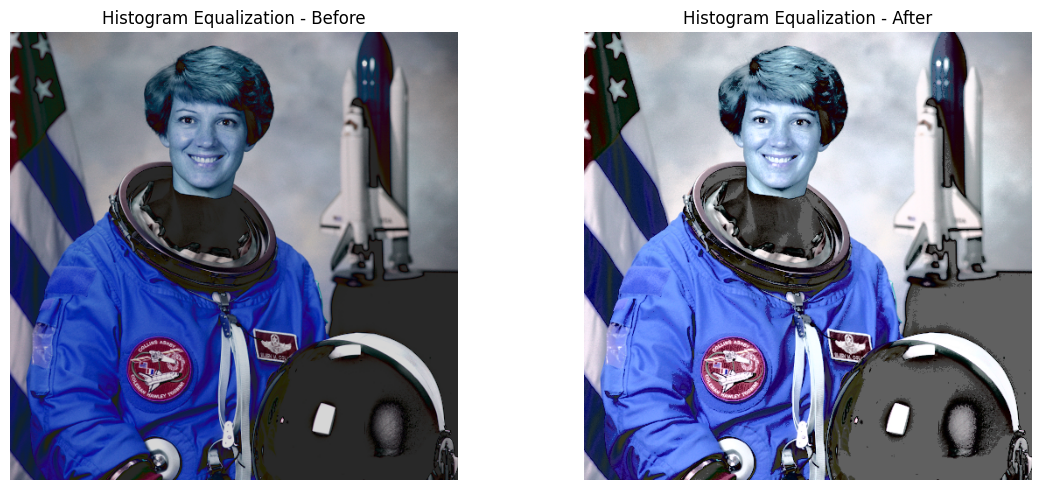

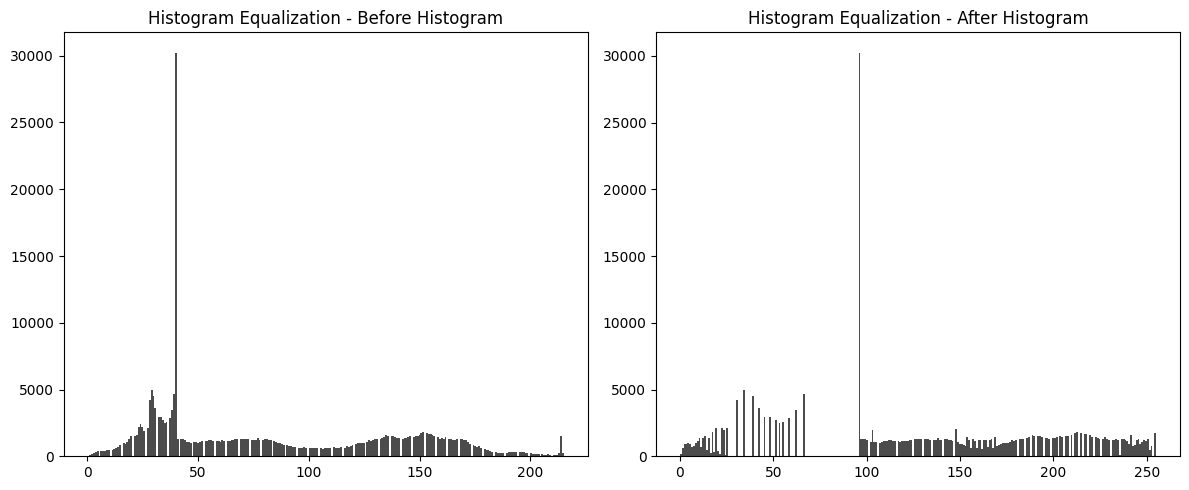

Histogram Equalization -> PSNR: 14.03, SSIM: 0.7854
Histogram Equalization -> Before - Brightness: 85.13, Contrast: 54.94
Histogram Equalization -> After - Brightness: 129.98, Contrast: 72.28


In [48]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import data, util, img_as_ubyte
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# === Image Processing Filters and Enhancements ===
def apply_median(img):
    return cv2.medianBlur(img, 5)

def apply_gaussian(img):
    return cv2.GaussianBlur(img, (5, 5), 0)

def apply_bilateral(img):
    return cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

def enhance_clahe(img):
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    l_clahe = clahe.apply(l)
    lab_clahe = cv2.merge((l_clahe, a, b))
    return cv2.cvtColor(lab_clahe, cv2.COLOR_LAB2BGR)

def enhance_hist_eq(img):
    yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    yuv[:, :, 0] = cv2.equalizeHist(yuv[:, :, 0])
    return cv2.cvtColor(yuv, cv2.COLOR_YUV2BGR)

# === Contrast and Brightness Adjustment ===
def adjust_contrast_brightness(img, alpha=1.0, beta=0):
    """
    Adjust the contrast (alpha) and brightness (beta) of an image.
    alpha > 1 increases contrast, beta > 0 increases brightness.
    """
    return cv2.convertScaleAbs(img, alpha=alpha, beta=beta)

# === Display Images and Histograms ===
def display_comparison_and_histograms(before, after, title):
    # Plot the image comparison
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(before, cv2.COLOR_BGR2RGB))
    plt.title(f"{title} - Before")
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(after, cv2.COLOR_BGR2RGB))
    plt.title(f"{title} - After")
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

    # Plot histograms
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.hist(cv2.cvtColor(before, cv2.COLOR_BGR2GRAY).ravel(), bins=256, color='black', alpha=0.7)
    plt.title(f"{title} - Before Histogram")
    
    plt.subplot(1, 2, 2)
    plt.hist(cv2.cvtColor(after, cv2.COLOR_BGR2GRAY).ravel(), bins=256, color='black', alpha=0.7)
    plt.title(f"{title} - After Histogram")
    
    plt.tight_layout()
    plt.show()

# === Quality Metrics ===
def quality_metrics(original, processed, title):
    gray_orig = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
    gray_proc = cv2.cvtColor(processed, cv2.COLOR_BGR2GRAY)
    psnr = peak_signal_noise_ratio(gray_orig, gray_proc)
    ssim = structural_similarity(gray_orig, gray_proc)
    print(f"{title} -> PSNR: {psnr:.2f}, SSIM: {ssim:.4f}")

# === Contrast and Brightness Measurements ===
def calculate_contrast_brightness(img):
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    brightness = np.mean(gray_img)  # Average pixel intensity
    contrast = np.std(gray_img)  # Standard deviation of pixel intensity
    return brightness, contrast

# === Generate Test Images ===
base = img_as_ubyte(data.astronaut())

img1 = img_as_ubyte(util.random_noise(base, mode='s&p', amount=0.1))  # Salt & pepper
img2 = img_as_ubyte(util.random_noise(base, mode='gaussian', var=0.01))  # Gaussian noise
img3 = img_as_ubyte(util.random_noise(base, mode='speckle', var=0.02))  # Speckle noise
img4 = cv2.convertScaleAbs(base, alpha=0.7, beta=0)  # Low contrast
img5 = cv2.convertScaleAbs(base, alpha=1.0, beta=-40)  # Underexposed

# Save original inputs for visual reference
cv2.imwrite("image1_median.jpg", img1)
cv2.imwrite("image2_gaussian.jpg", img2)
cv2.imwrite("image3_bilateral.jpg", img3)
cv2.imwrite("image4_clahe.jpg", img4)
cv2.imwrite("image5_hist_eq.jpg", img5)

# === Apply Filters ===
results = []

median_result = apply_median(img1)
results.append(("Median Filter", img1, median_result))

gaussian_result = apply_gaussian(img2)
results.append(("Gaussian Blur", img2, gaussian_result))

bilateral_result = apply_bilateral(img3)
results.append(("Bilateral Filter", img3, bilateral_result))

clahe_result = enhance_clahe(img4)
results.append(("CLAHE Enhancement", img4, clahe_result))

hist_eq_result = enhance_hist_eq(img5)
results.append(("Histogram Equalization", img5, hist_eq_result))

# === Display and Save Results ===
for name, before, after in results:
    display_comparison_and_histograms(before, after, name)
    quality_metrics(before, after, name)
    
    # Calculate and print contrast and brightness
    before_brightness, before_contrast = calculate_contrast_brightness(before)
    after_brightness, after_contrast = calculate_contrast_brightness(after)
    
    print(f"{name} -> Before - Brightness: {before_brightness:.2f}, Contrast: {before_contrast:.2f}")
    print(f"{name} -> After - Brightness: {after_brightness:.2f}, Contrast: {after_contrast:.2f}")
    
    cv2.imwrite(f"filtered_{name.lower().replace(' ', '_')}.jpg", after)
